$$\frac{dT}{dt} = \frac{2\pi r h}{C_p (\rho \pi r^2 + \frac{\dot m}{\rho \pi r^2})} (T_{abs} -T)$$

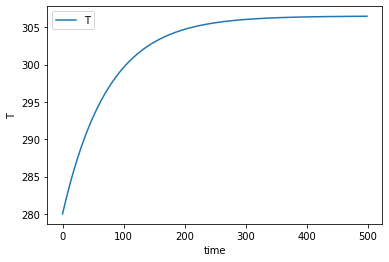

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from materials import Water

time_final = 500
time_step = 1
rho = 1000      # density (kg/m3)
r = 10/1000     # tube inner diameter (m)
h = 286.8       # water heat transfer coefficient (W/m.k)
t_abs = 306.5   # absorber temperature (K)
# t_water = 302.1 # water temperature (K) values from here https://github.com/orestispanago/FPC-Thermal-Model
cp_water = 4200 # water heat capacity (J/kg.K)

flow_per_tube = 6.85            # mass flow rate per tube (L/h)
Vdot = flow_per_tube / 3.6e+6   # volume flow rate per tube (m**3/s)
mdot = Vdot * rho               # mass flow rate per tube (Kg/s)


water = Water()


def model(T, t):
    rho = water.rho(T)
    cp_water = water.cp(T)
    rho_pi_r2 = rho * np.pi * r**2
    dTdt = 2*np.pi * r * h / (cp_water*(rho_pi_r2 + mdot/rho_pi_r2))*(t_abs - T)
    return dTdt

T0 = 280

t = np.arange(0, time_final, time_step)
T = odeint(model, T0, t)


plt.plot(t, T, label="T")
plt.xlabel("time")
plt.ylabel("T")
plt.legend()
plt.show()
